In [1]:
import numpy as np 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
data_Frame = pd.read_csv('..\\diamonds.csv')
data_Frame

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
features = data_Frame.drop(['price','Unnamed: 0'], axis=1)

In [4]:
data_Frame['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [5]:
features['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [6]:
features['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [7]:
features['cut']= data_Frame['cut'].map({'Ideal':4, 'Premium':3, 'Very Good':2, 'Good':1, 'Fair':0})
features['color']= data_Frame['color'].map({'E': 0, 'I': 1, 'J': 2, 'H': 3, 'F': 4, 'G': 5, 'D': 6})
features['clarity']= data_Frame['clarity'].map({'SI2': 0, 'SI1': 1, 'VS1': 2, 'VS2': 3, 'VVS2': 4, 'VVS1': 5, 'I1': 6 ,'IF':7})

In [8]:
features.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,4,0,0,61.5,55.0,3.95,3.98,2.43
1,0.21,3,0,1,59.8,61.0,3.89,3.84,2.31
2,0.23,1,0,2,56.9,65.0,4.05,4.07,2.31
3,0.29,3,1,3,62.4,58.0,4.20,4.23,2.63
4,0.31,1,2,0,63.3,58.0,4.34,4.35,2.75


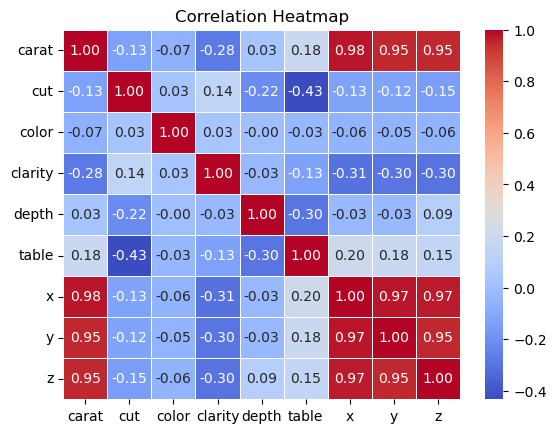

In [9]:
matrix = features.corr()

# plt.figure(figsize=(8,6))
sns.heatmap(matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [10]:
features = features.to_numpy()
scaler = StandardScaler()
x_scaled = scaler.fit_transform(features)
y = data_Frame['price']
y = y.to_numpy()

In [11]:
[xtrain,xtest,ytrain,ytest]=train_test_split(x_scaled,y,test_size=0.2)

In [12]:

model= svm.SVR()
model.fit(xtrain, ytrain)
model.predict(xtest)
score = model.score(xtest, ytest)
score



KeyboardInterrupt: 